In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Dataset setup

## Load the dataset from .csv file

In [54]:
input_file = "data.csv"
df = pd.read_csv(input_file, header = 0)
df.describe()

,# Liquid Flow Rate (mL/min),Atomization O2 Flow Rate (L/min),Sheath O2 Flow Rate (L/min),ER1 (EtOH/AtomO2),ER2 (EtOH/AtomO2+SheathO2),Burner Cap Temperature,Result
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,8.866792,9.269434,9.767925,0.848491,0.416226,573.226415,1.641509
std,1.633283,1.564203,3.051593,0.170963,0.107188,2971.982423,0.653227
min,6.060000,6.180000,5.100000,0.510000,0.230000,130.000000,0.000000
25%,7.500000,8.100000,6.900000,0.760000,0.350000,137.000000,1.000000
50%,8.940000,9.420000,9.900000,0.840000,0.400000,146.000000,2.000000
75%,10.000000,10.500000,12.500000,0.960000,0.490000,203.000000,2.000000
max,11.900000,11.900000,14.900000,1.160000,0.660000,21800.000000,2.000000


## Split into input (X) and output (y) variables

In [55]:
dataset = df.values
X = dataset[:,1:7]
y = dataset[:,7]
y = y.astype('int')

# Analyze dataset

## Check if data is skewed
What should my threshold be?

Stable: 73.58490566037736 %
Maybe: 16.9811320754717 %
Unstable: 9.433962264150944 %


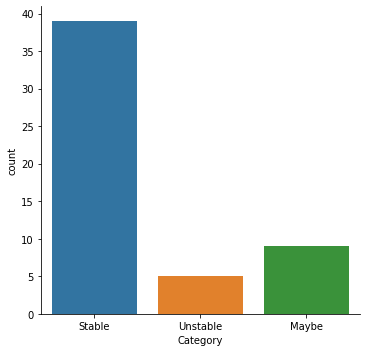

In [56]:
sns.catplot(x="Category", kind="count", data=df)
count = df["Result"].value_counts()
count = count.tolist()
print(f"Stable: {count[0] / len(X) * 100} %")
print(f"Maybe: {count[1] / len(X) * 100} %")
print(f"Unstable: {count[2] / len(X) * 100} %")

## Finding patterns graphically

### Pair plots and histograms of stable vs unstable
What to do with the outlier?

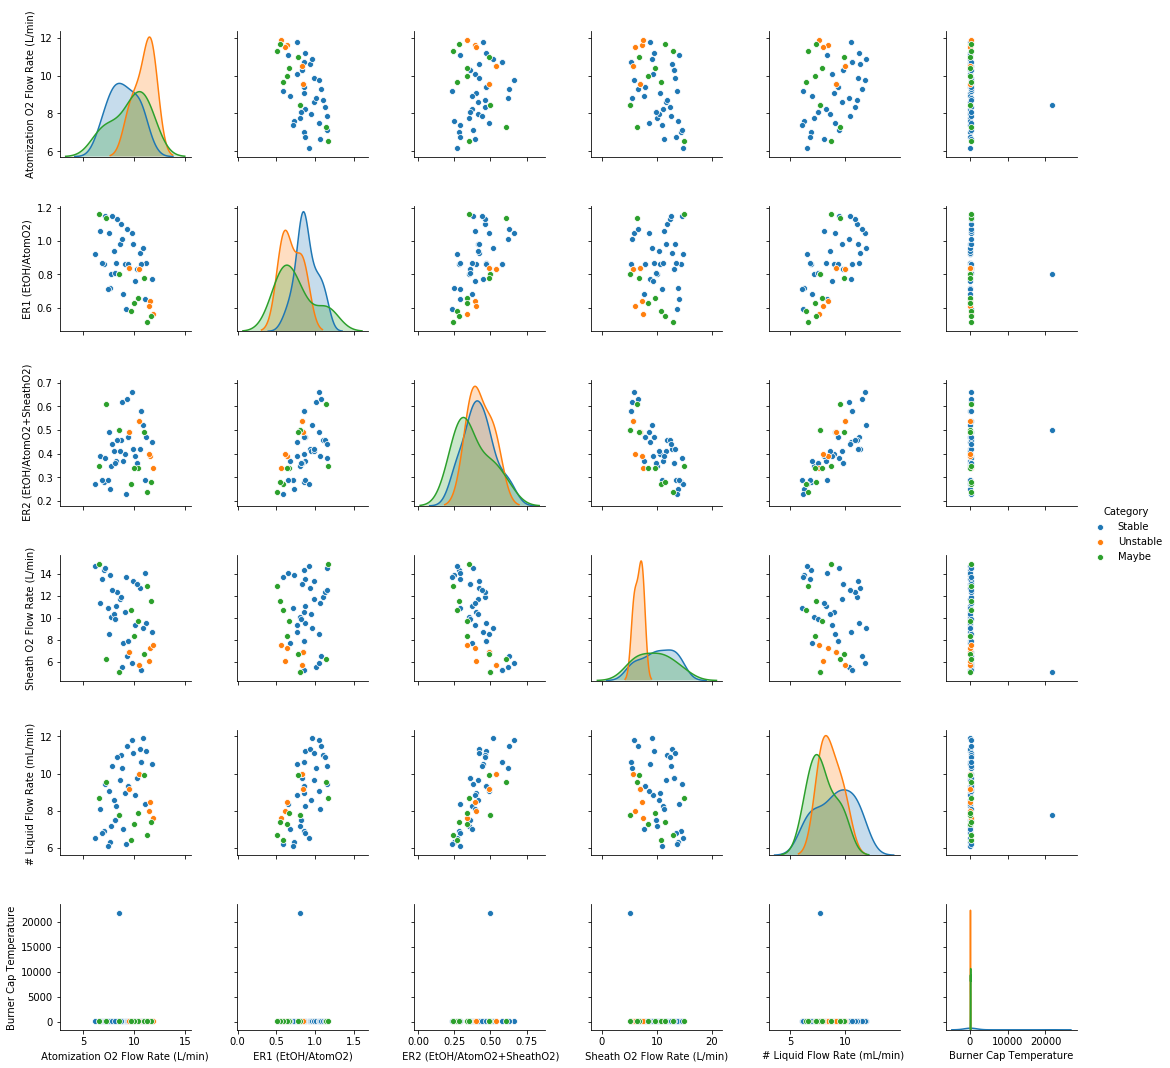

In [57]:
sns.pairplot(df[df.columns.difference(['Result'])], hue='Category')

# Machine Learning

## Prepare data for models

### Standardize the data for ease of use and increased performance
Should I be scaling the only the train and will it affect my model?

In [58]:
scale = StandardScaler().fit(X)
X_std = scale.transform(X)

### Split into train and test set

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, train_size=.9)

## PCA

### 2D

In [60]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

In [61]:
stable = np.array([0.0,0.0])
maybe = np.array([0.0,0.0])
unstable = np.array([0.0,0.0])
for i in range(len(X_pca)):
    if y[i] == 2:
        stable = np.append(stable, X_pca[i])
    elif y[i] == 1:
        maybe = np.append(maybe, X_pca[i])
    else:
        unstable = np.append(unstable, X_pca[i])
stable = stable.reshape((count[0]+1, 2))
maybe = maybe.reshape((count[1]+1, 2))
unstable = unstable.reshape((count[2]+1, 2))

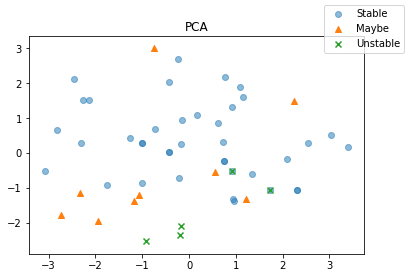

In [62]:
fig, ax = plt.subplots()
ax.scatter(stable[1:, 0], stable[1:, 1], alpha=0.5)
ax.scatter(maybe[1:, 0], maybe[1:, 1], marker="^")
ax.scatter(unstable[1:, 0], unstable[1:, 1], marker="x")
ax.set_title("PCA")
fig.legend(["Stable", "Maybe", "Unstable"])

### 3D

In [63]:
%matplotlib notebook

In [64]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [65]:
stable = np.array([0.0,0.0,0.0])
maybe = np.array([0.0,0.0,0.0])
unstable = np.array([0.0,0.0,0.0])
for i in range(len(X_pca)):
    if y[i] == 2:
        stable = np.append(stable, X_pca[i])
    elif y[i] == 1:
        maybe = np.append(maybe, X_pca[i])
    else:
        unstable = np.append(unstable, X_pca[i])
stable = stable.reshape((count[0]+1, 3))
maybe = maybe.reshape((count[1]+1, 3))
unstable = unstable.reshape((count[2]+1, 3))

In [66]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(stable[1:, 0], stable[1:, 1], stable[1:, 2], alpha=0.5)
ax.scatter(maybe[1:, 0], maybe[1:, 1], maybe[1:, 2], marker="^")
ax.scatter(unstable[1:, 0], unstable[1:, 1], unstable[1:, 2], marker="x")
ax.set_title("PCA")

<IPython.core.display.Javascript object>

Text(0.5, 0.92, 'PCA')